<a href="https://colab.research.google.com/github/Emangohar/Students-Data-Visualization-/blob/main/linearRegression_and_loristicRregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [29]:
#  Create dataset
data = {
    "Hours_Study": [2, 3, 4, 5, 6, 7, 8, 9, 10, 1],
    "Marks": [40, 50, 55, 60, 65, 70, 78, 85, 90, 30],
    "Pass_Fail": [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]  # 1 = Pass, 0 = Fail
}
df = pd.DataFrame(data)
X = df[["Hours_Study"]]
y_reg = df["Marks"]
y_cls = df["Pass_Fail"]

In [6]:
# Split dataset
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)


In [8]:
print(X_train, X_test, y_train_reg, y_test_reg)

   Hours_Study
5            7
0            2
7            9
2            4
9            1
4            6
3            5
6            8    Hours_Study
8           10
1            3 5    70
0    40
7    85
2    55
9    30
4    65
3    60
6    78
Name: Marks, dtype: int64 8    90
1    50
Name: Marks, dtype: int64


In [10]:
print(y_test_cls , y_train_cls)

8    1
1    1
Name: Pass_Fail, dtype: int64 5    1
0    1
7    1
2    1
9    0
4    1
3    1
6    1
Name: Pass_Fail, dtype: int64


In [13]:
# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train_reg)
y_pred_reg = lin_model.predict(X_test)

In [14]:
# Calculate regression metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

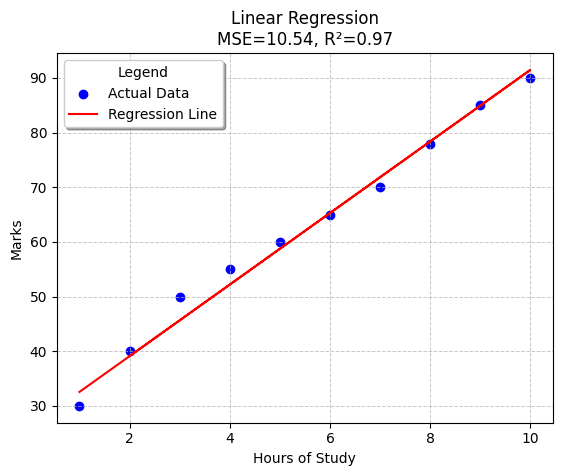

In [17]:
# Plot Linear Regression
plt.scatter(X, y_reg, color="blue", label="Actual Data")
plt.plot(X, lin_model.predict(X), color="red", label="Regression Line")
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.title(f"Linear Regression\nMSE={mse:.2f}, R²={r2:.2f}")
plt.legend(loc="best", fontsize=10, frameon=True, shadow=True, title="Legend")
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()

In [18]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train_cls)
y_pred_cls = log_model.predict(X_test)


In [22]:
# Calculate classification accuracy
accuracy = accuracy_score(y_test_cls, y_pred_cls)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


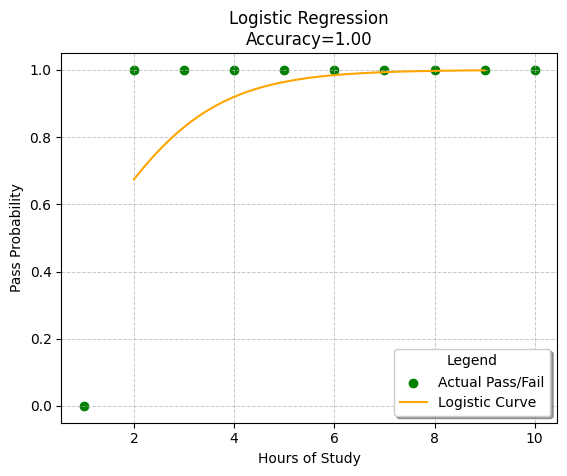

In [24]:
# Plot Logistic Regression
X_values = np.linspace(2, 9, 100).reshape(-1, 1)
y_prob = log_model.predict_proba(X_values)[:, 1]
plt.scatter(X, y_cls, color="green", label="Actual Pass/Fail")
plt.plot(X_values, y_prob, color="orange", label="Logistic Curve")
plt.xlabel("Hours of Study")
plt.ylabel("Pass Probability")
plt.title(f"Logistic Regression\nAccuracy={accuracy:.2f}")
plt.legend(loc="best", fontsize=10, frameon=True, shadow=True, title="Legend")
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()